In [ ]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')

data_path = '/content/drive/My Drive/Dataset/Inbreast'

image_folder = os.path.join(data_path, 'image')
image_files = os.listdir(image_folder)

caption_folder = os.path.join(data_path, 'caption')
caption_files = os.listdir(caption_folder)

print(f"Số lượng hình ảnh: {len(image_files)}")
print(f"Số lượng caption: {len(caption_files)}")

for image_file, caption_file in zip(image_files, caption_files):
    print(f"Image: {image_file}, Caption: {caption_file}")

captions = []
for caption_file in caption_files:
    with open(os.path.join(caption_folder, caption_file), 'r') as f:
        caption = f.read().strip()
        captions.append(caption)

data = pd.DataFrame({'Image': image_files, 'Caption': captions})

print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Số lượng hình ảnh: 296
Số lượng caption: 296
Image: 22614074_6bd24a0a42c19ce1_MG_R_CC_ANON.jpg, Caption: 22671003_f571fd4e63c718e3_MG_L_ML_ANON.txt
Image: 24055752_f0f1a133837b5137_MG_R_ML_ANON.jpg, Caption: 22580218_5530d5782fc89dd7_MG_L_CC_ANON.txt
Image: 22678787_64a22c47765f0c5c_MG_R_CC_ANON.jpg, Caption: 22678810_64a22c47765f0c5c_MG_L_CC_ANON.txt
Image: 22678449_60995d51033e24b8_MG_R_CC_ANON.jpg, Caption: 53582331_8913a7e0cf3bd74e_MG_R_CC_ANON.txt
Image: 51049249_832ebce700241036_MG_L_CC_ANON.jpg, Caption: 24065461_83db89f57aea498a_MG_R_CC_ANON.txt
Image: 20587294_e634830794f5c1bd_MG_R_CC_ANON.jpg, Caption: 50996709_330e5fe16929eed4_MG_R_ML_ANON.txt
Image: 24055024_2f1104b3cda7f145_MG_R_ML_ANON.jpg, Caption: 22614266_1e5c3af078f74b05_MG_L_ML_ANON.txt
Image: 22580038_6200187f3f1ccc18_MG_L_CC_ANON.jpg, Caption: 20587612_f4b2d377f43ba0bd_MG_R_CC_ANON.txt
Im

In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

def preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = np.array(image) / 255.0
    return image

# PCA
def apply_pca(images, n_components=100):
    images_flat = images.reshape(images.shape[0], -1)
    pca = PCA(n_components=n_components)
    images_pca = pca.fit_transform(images_flat)
    return images_pca

images = []

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    image = preprocess_image(image_path)
    images.append(image)

images = np.array(images)

images_pca = apply_pca(images)

In [ ]:
import os
dataset_path = '/content/drive/My Drive/Dataset/Inbreast'
os.chdir(dataset_path)
print(os.listdir())

['caption', 'image']


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

images_dir = '/content/drive/My Drive/Dataset/Inbreast/image'
captions_dir = '/content/drive/My Drive/Dataset/Inbreast/caption'

filenames = [os.path.splitext(file)[0] for file in os.listdir(images_dir)]

images = []
captions = []

for filename in filenames:
    image_path = os.path.join(images_dir, filename + '.jpg')
    caption_path = os.path.join(captions_dir, filename + '.txt')

    images.append(Image.open(image_path))

    with open(caption_path, 'r', encoding='utf-8') as f:
        captions.append(f.read())

print(len(images))
print(len(captions))

296
296


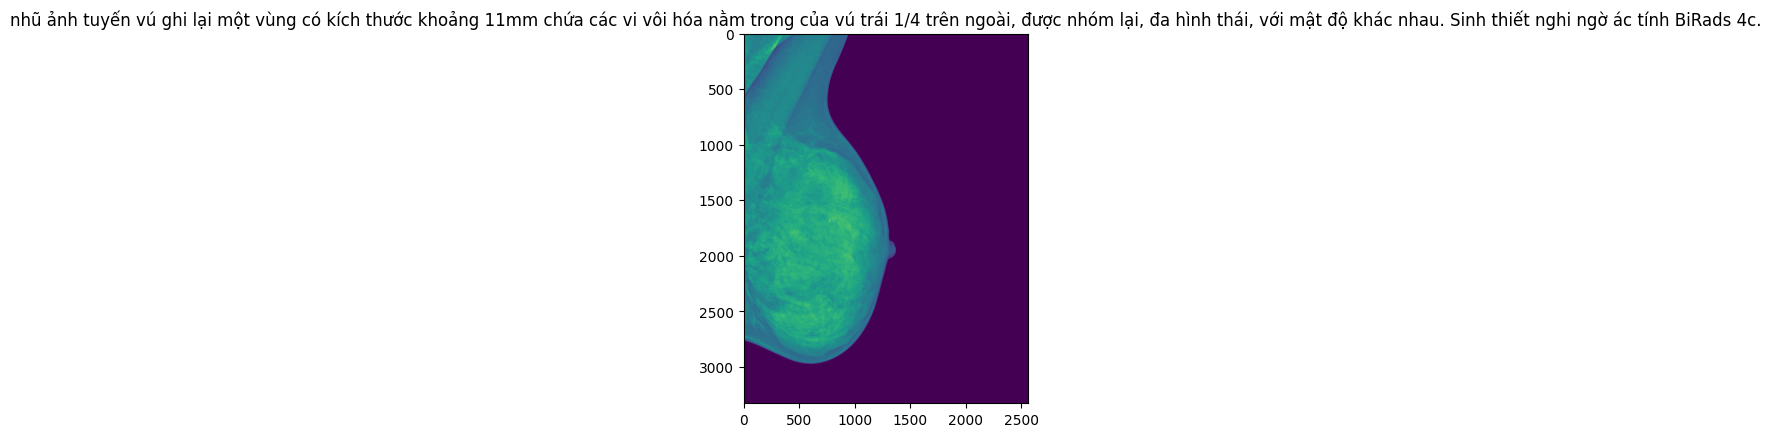

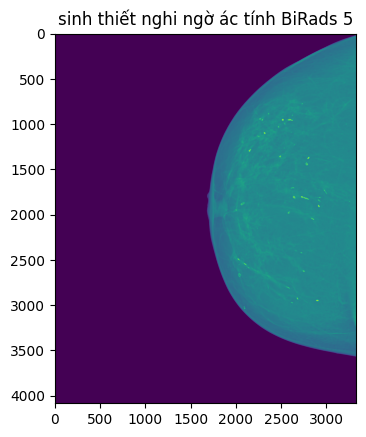

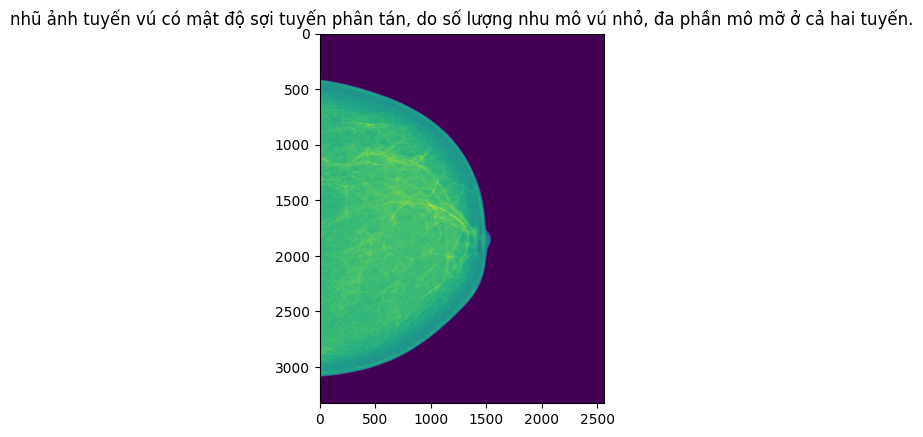

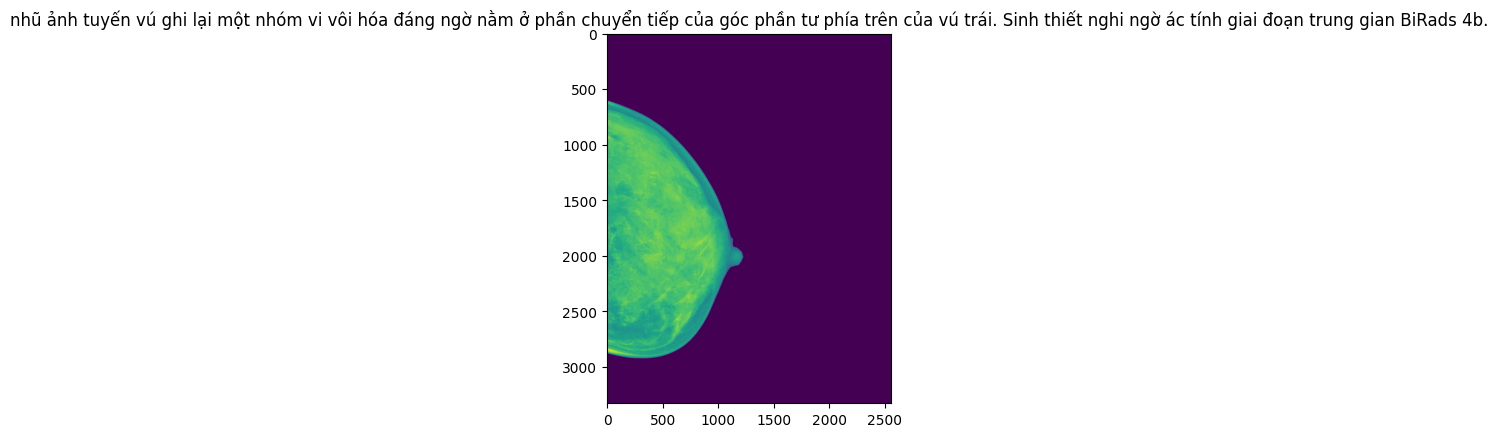

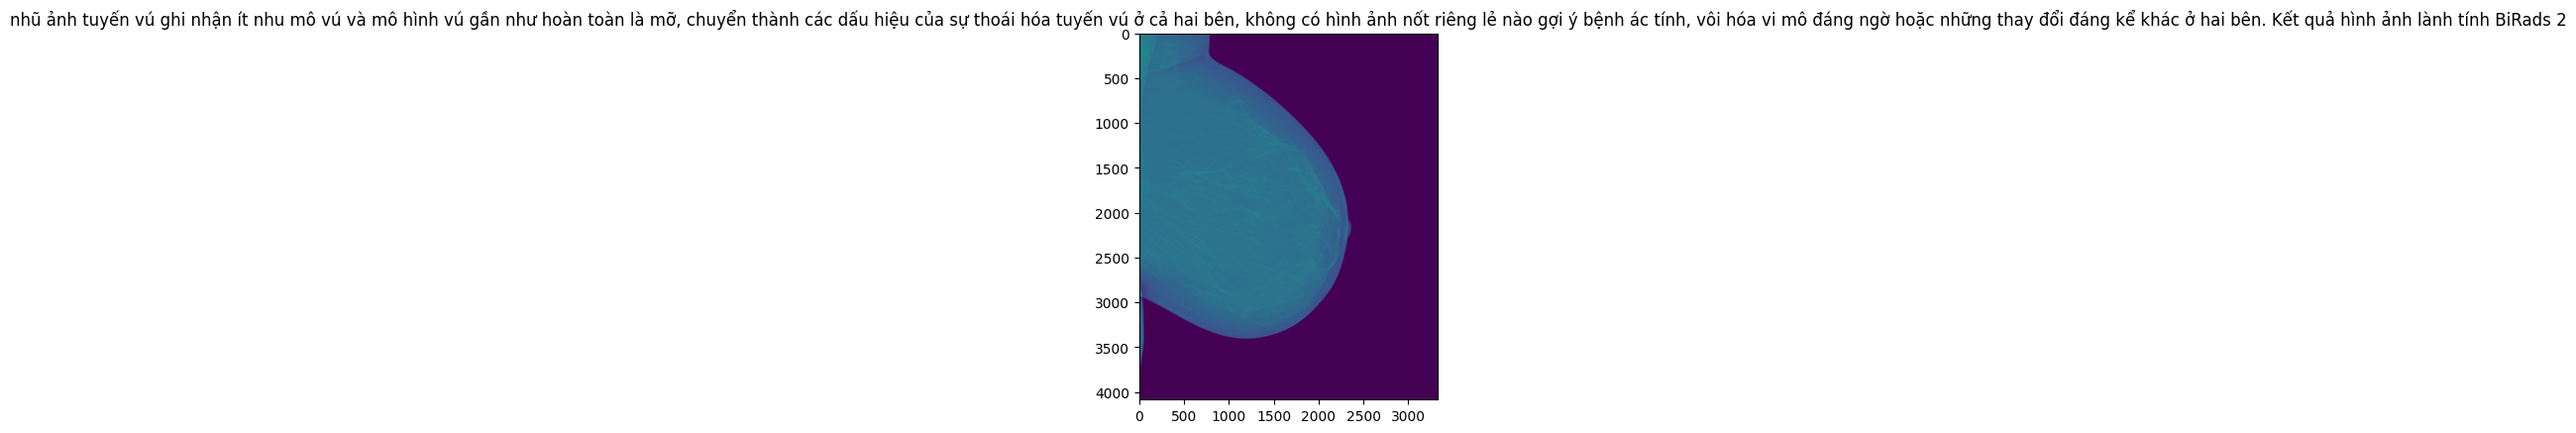

In [ ]:
for i in range(5):
    plt.imshow(images[i])
    plt.title(captions[i])
    plt.show()

In [ ]:
from underthesea import word_tokenize

# Example to show you can import and call a function
print(word_tokenize("một nốt nằm ở vú trái có đường kính 25 mm, với những dấu hiệu đáng ngờ là ác tính. Sinh thiết nghi ngờ ác tính BiRads 5."))

['một', 'nốt', 'nằm', 'ở', 'vú', 'trái', 'có', 'đường kính', '25', 'mm', ',', 'với', 'những', 'dấu hiệu', 'đáng', 'ngờ', 'là', 'ác tính', '.', 'Sinh thiết', 'nghi ngờ', 'ác tính', 'BiRads', '5', '.']
